In [1]:
from Trader import Trader
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import numpy as np


In [2]:
import sys
sys.path.append("..")
import stocksOps as so

In [3]:
data = so.downloadIntradayData("NVDA")

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()
data.shape

(2729, 6)

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-20 09:30:00-05:00,160.639999,160.750000,159.670593,160.410004,160.410004,736978
2022-12-20 09:31:00-05:00,160.369995,160.800003,159.970001,160.554993,160.554993,154608
2022-12-20 09:32:00-05:00,160.600006,161.100006,159.804993,160.970001,160.970001,219936
2022-12-20 09:33:00-05:00,161.009903,161.119995,160.580002,161.039993,161.039993,243459
2022-12-20 09:34:00-05:00,161.059998,161.100006,160.259995,160.850006,160.850006,168917


In [6]:
#so.anotherNormalizerDataset(data)

In [7]:
data = so.calculateAll(data)
data = so.cleanDataFrame(data, 10)

In [8]:

data

,Open,High,Low,Close,Adj Close,Volume,returns,SMA,EMA,WMA,ATR,ATR_WMA,ATR_EMA,Momentum,ROC
Datetime,,,,,,,,,,,,,,,
2022-12-20 09:40:00-05:00,161.410004,161.600006,160.440002,160.779999,160.779999,256859,0.001308,161.119130,161.101855,161.178632,0.629874,0.749953,0.796598,0.369995,0.230656
2022-12-20 09:41:00-05:00,160.740005,161.020004,160.529999,160.570007,160.570007,143364,0.005470,161.079130,160.968893,161.041352,0.718447,0.692842,0.719950,0.015015,0.009352
2022-12-20 09:42:00-05:00,160.570007,160.580002,159.639999,159.696503,159.696503,235839,-0.001753,160.927202,160.650795,160.695695,0.668446,0.760731,0.774963,-1.273499,-0.791140
2022-12-20 09:43:00-05:00,159.740005,160.137802,159.661301,159.977005,159.977005,169875,0.004814,160.784788,160.482348,160.458146,0.712960,0.701617,0.700348,-1.062988,-0.660077
2022-12-20 09:44:00-05:00,159.968994,159.968994,159.210007,159.210495,159.210495,182515,-0.000687,160.459144,160.164385,160.064572,0.720917,0.713137,0.717010,-1.639511,-1.019279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29 15:56:00-05:00,146.380005,146.410004,146.259995,146.309998,146.309998,168237,0.000615,146.466115,146.457693,146.436092,0.201957,0.206858,0.203448,-0.404999,-0.276045
2022-12-29 15:57:00-05:00,146.300003,146.359894,146.199997,146.220001,146.220001,152693,0.001164,146.423257,146.398270,146.374563,0.203387,0.195986,0.192560,-0.580002,-0.395097
2022-12-29 15:58:00-05:00,146.229996,146.250000,146.039993,146.050003,146.050003,184453,0.000137,146.357143,146.311203,146.281250,0.183371,0.202645,0.196922,-0.649994,-0.443077


In [9]:
so.normalizeDataset(data)

In [10]:
# get max of atr's and  roc's
atr_np = data["ATR"].to_numpy()
max(atr_np)
atr_wma_np = data["ATR_WMA"].to_numpy()
min(atr_wma_np)

-1.276056708593923

In [11]:
roc_np = data["ROC"].to_numpy()
max(roc_np[6:100])

4.446686369230644

In [12]:
mom_np = data["Momentum"].to_numpy()
min(mom_np)

-8.469033516323243

In [13]:
data

,Open,High,Low,Close,Adj Close,Volume,returns,SMA,EMA,WMA,ATR,ATR_WMA,ATR_EMA,Momentum,ROC
Datetime,,,,,,,,,,,,,,,
2022-12-20 09:40:00-05:00,1.190402,1.196387,1.091637,1.116006,1.116006,2.012933,0.839504,1.154123,1.152407,1.161961,2.476333,3.232028,3.659103,0.543224,0.521489
2022-12-20 09:41:00-05:00,1.110900,1.127616,1.102322,1.091093,1.091093,0.589754,3.587979,1.149378,1.136630,1.145674,3.087055,2.847118,3.125864,0.088473,0.085257
2022-12-20 09:42:00-05:00,1.090729,1.075445,0.996662,0.987462,0.987462,1.749351,-1.182023,1.131355,1.098886,1.104666,2.742292,3.304674,3.508590,-1.562189,-1.492663
2022-12-20 09:43:00-05:00,0.992241,1.023014,0.999191,1.020740,1.020740,0.922191,3.155212,1.114461,1.078898,1.076483,3.049224,2.906255,2.989493,-1.292513,-1.234313
2022-12-20 09:44:00-05:00,1.019412,1.002998,0.945613,0.929802,0.929802,1.080691,-0.478051,1.075832,1.041169,1.029790,3.104084,2.983899,3.105414,-2.031073,-1.942368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29 15:56:00-05:00,-0.593053,-0.604687,-0.591799,-0.600697,-0.600697,0.901651,0.382325,-0.584102,-0.585234,-0.587070,-0.474213,-0.428300,-0.467422,-0.449589,-0.477313
2022-12-29 15:57:00-05:00,-0.602546,-0.610629,-0.598922,-0.611374,-0.611374,0.706736,0.744532,-0.589186,-0.592285,-0.594370,-0.464353,-0.501578,-0.543168,-0.673778,-0.711986
2022-12-29 15:58:00-05:00,-0.610853,-0.623659,-0.617917,-0.631543,-0.631543,1.104993,0.066336,-0.597029,-0.602616,-0.605441,-0.602360,-0.456699,-0.512825,-0.763442,-0.806565


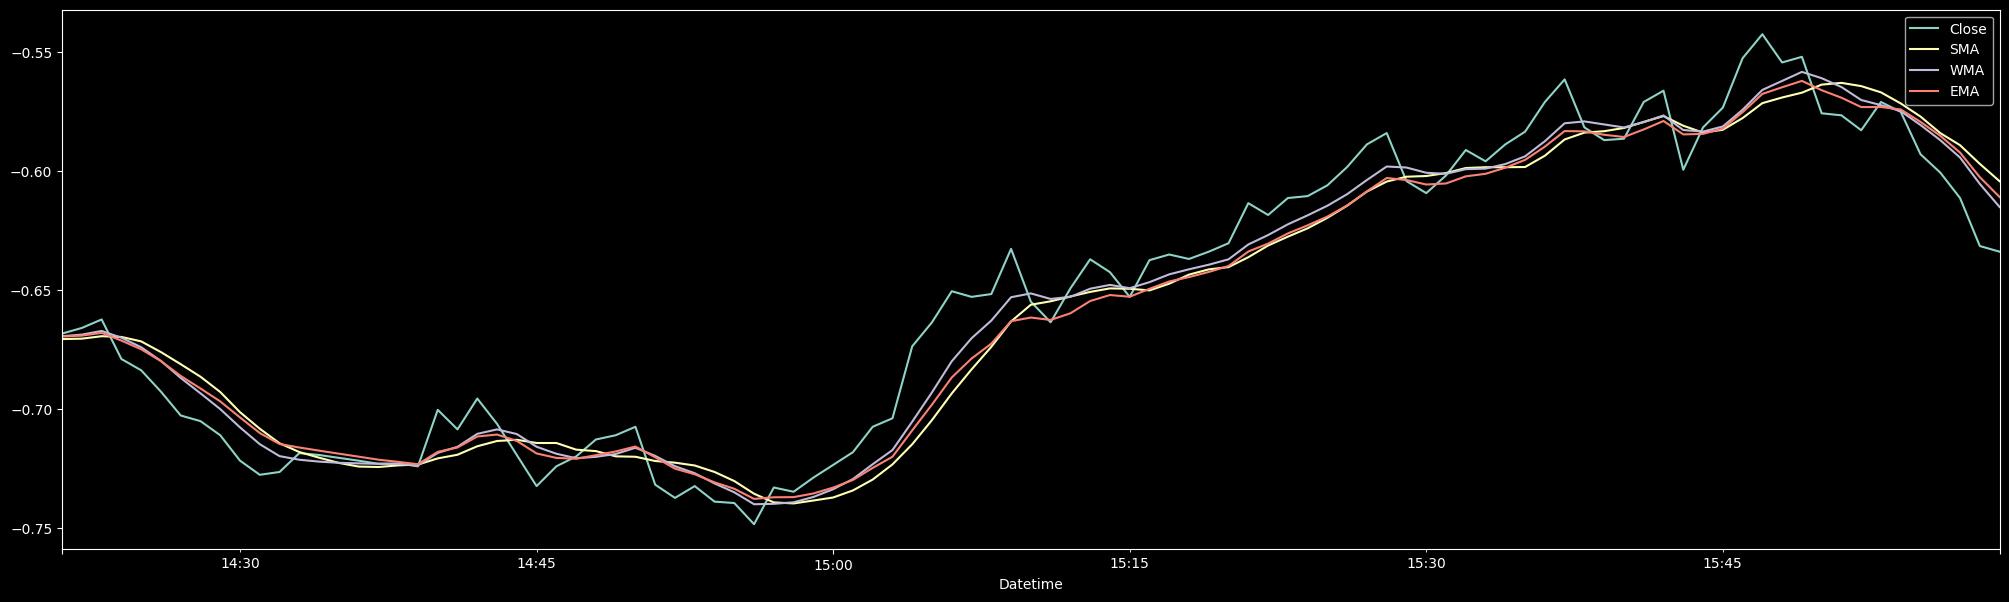

In [14]:
# https://www.analyticsvidhya.com/blog/2021/07/stock-prices-analysis-with-python/
plt.style.use('dark_background')
#data.reset_index(inplace=True)
data.Close[-100:-1].plot(label="Close", figsize=(25, 7))
data.SMA[-100:-1].plot(label="SMA")
data.WMA[-100:-1].plot(label="WMA")
data.EMA[-100:-1].plot(label="EMA")
plt.legend()
plt.show()

In [15]:
np.max(data.ROC.to_numpy())

4.446686369230644

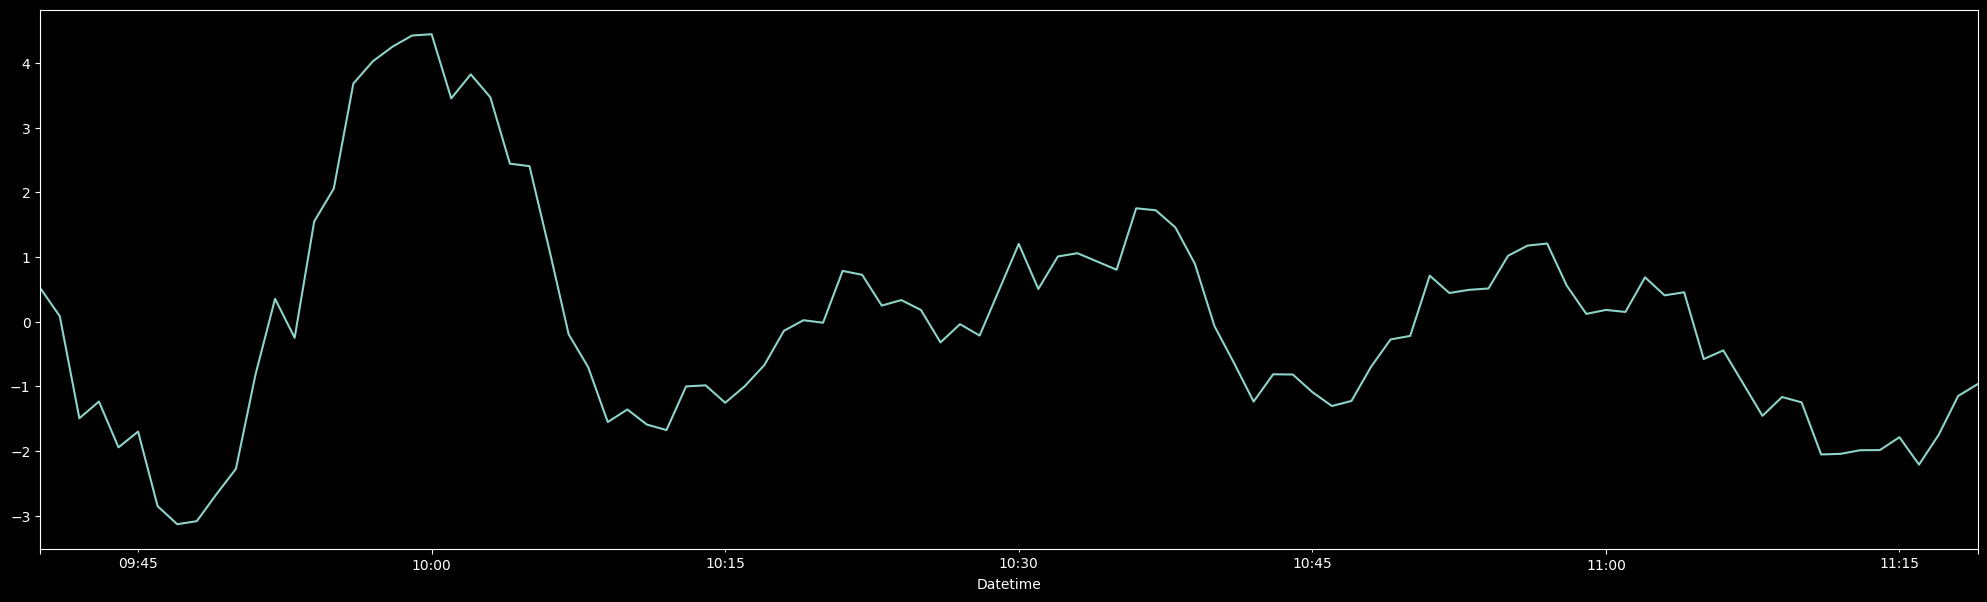

In [16]:
data.ROC[0:100].plot(label="ROC", figsize=(25, 7))
plt.show()

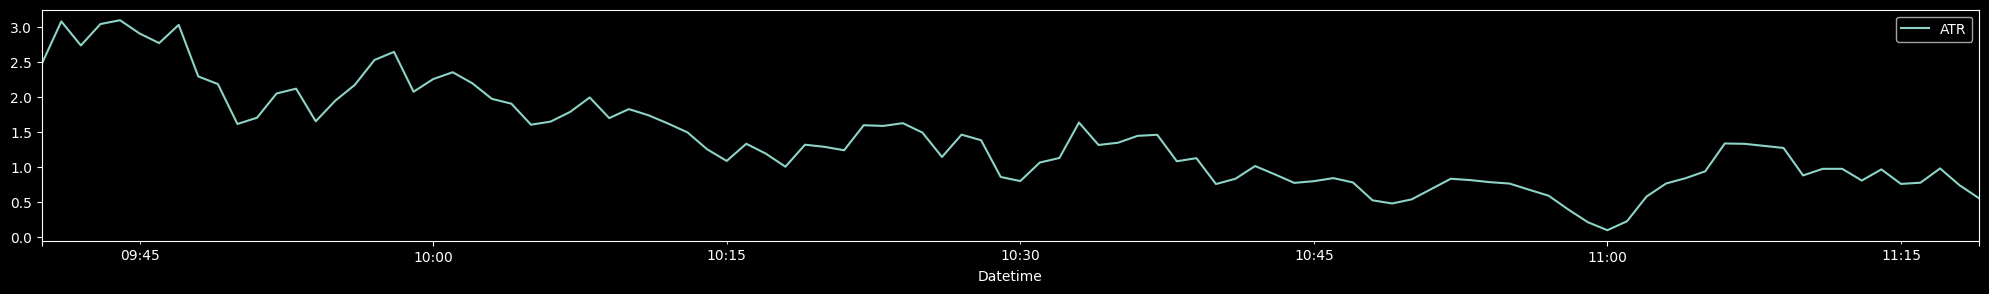

In [17]:

data.ATR[0:100].plot(label="ATR", figsize=(25, 3))
plt.legend()
plt.show()

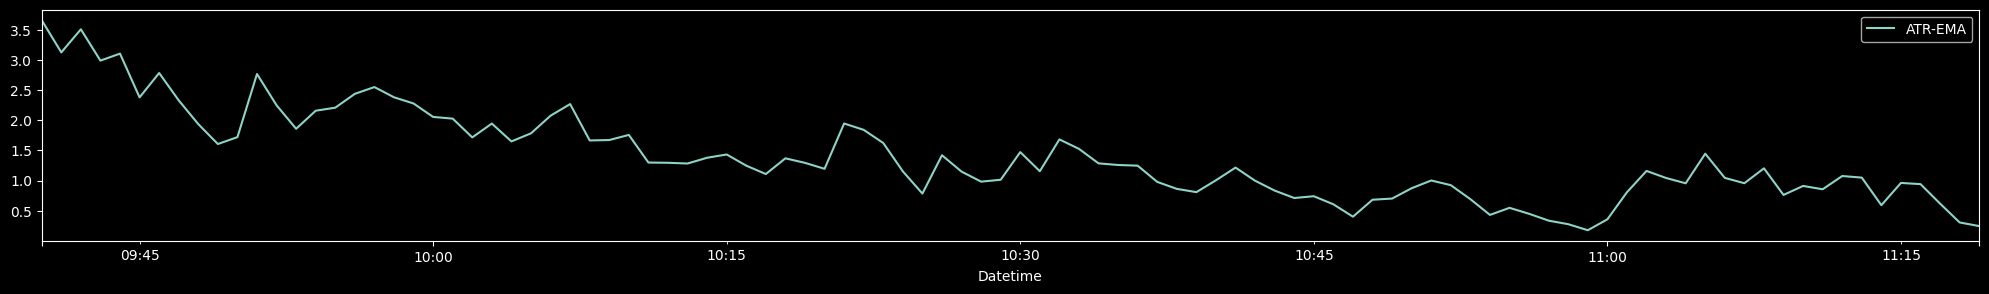

In [18]:

data.ATR_EMA[0:100].plot(label="ATR-EMA", figsize=(25, 3))
plt.legend()
plt.show()

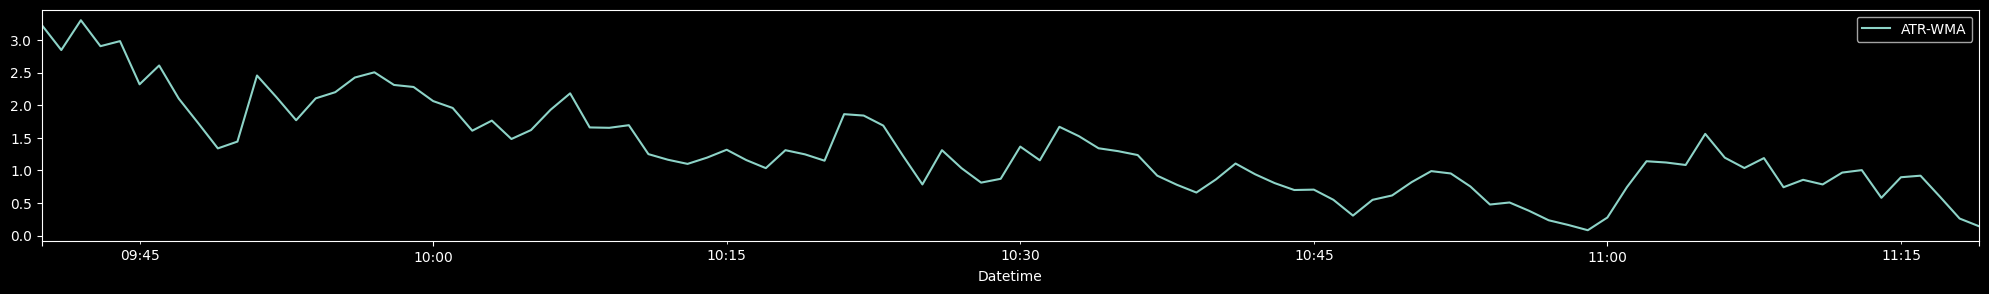

In [19]:

data.ATR_WMA[0:100].plot(label="ATR-WMA", figsize=(25, 3))
plt.legend()
plt.show()

In [20]:
data_np = data.to_numpy()
print(data_np)

[[ 1.19040226  1.19638661  1.09163731 ...  3.65910296  0.54322424
   0.52148898]
 [ 1.11090047  1.12761596  1.10232158 ...  3.12586437  0.08847316
   0.08525702]
 [ 1.09072853  1.07544501  0.99666176 ...  3.50858961 -1.5621888
  -1.49266264]
 ...
 [-0.61085327 -0.62365903 -0.61791717 ... -0.51282509 -0.7634423
  -0.80656464]
 [-0.63221115 -0.64381566 -0.64403369 ... -0.40312674 -0.81469563
  -0.86019716]
 [-0.63458485 -0.64974451 -0.61910371 ... -0.77304668 -0.55848765
  -0.5923993 ]]
